# Code of Part 4 in TensorFlow

In this repository, we will replicate the code from our Machine Learning Guide for Petroleum Professionals: Part 4 using TensorFlow. We have previously covered the Deep Learning from scratch using Numpy. If you are interested, you can read Part 4 of the guide  [here](https://jpt.spe.org/twa/machine-learning-guide-for-petroleum-professionals-part-4). Additionally, you can access the corresponding code from scratch on [GitHub](https://github.com/saifkhanengr/Machine-Learning-Guide-for-Petroleum-Professionals-Part-4/blob/main/Code%20of%20Part%204.ipynb). Without further ado, let's start reproducing the code in TensorFlow.

Before I start, I would like to thank Professor [Michael Pyrcz](https://www.linkedin.com/in/michael-pyrcz-%F0%9F%87%BA%F0%9F%87%A6-61a648a1/) of the University of Texas at Austin for generously providing me the porosity and permeability data. The complete dataset is available [here](https://zenodo.org/record/5564874#.Y_4VCHZBzCY).

First, import the necessary libraries and Framework (TensorFlow)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

## Import data
Same as in part 4

In [2]:
data = pd.read_csv('Stochastic_1D_por_perm_demo.csv')
data_top_bottom = pd.concat([data.head(5), data.tail(5)])
table_style = [{'selector': 'th', 'props': [('background-color', '#4287f5'), ('color', 'white'), ('font-size', '14px'), ('border', '1px solid black')]},
               {'selector': 'td', 'props': [('border', '1px solid black'), ('font-size', '14px'), ('text-align', 'center')]}]
styled_table = data_top_bottom.style.set_table_styles(table_style)
styled_table

,Unnamed: 0,Porosity,Permeability
0,0,13.746408,193.721529
1,1,9.608479,105.718666
2,2,11.664361,138.539297
3,3,8.375338,93.719985
4,4,13.183358,169.738824
100,100,8.042614,84.564471
101,101,19.887759,453.228801
102,102,11.118544,128.606149
103,103,16.051620,265.341789
104,104,17.762477,337.335817


## Drop Unnamed: 0 column, and check null

In [3]:
data = data.drop(data.columns[0], axis=1)
null_values = data.isnull().sum()
print(f"Null values: {null_values}")

Null values: Porosity        0
Permeability    0
dtype: int64


**Checking our data after dropping the unnamed column:**

In [4]:
data_top_bottom = pd.concat([data.head(5), data.tail(5)])
table_style = [{'selector': 'th', 'props': [('background-color', '#4287f5'), ('color', 'white'), ('font-size', '14px'), ('border', '1px solid black')]},
               {'selector': 'td', 'props': [('border', '1px solid black'), ('font-size', '14px'), ('text-align', 'center')]}]
styled_table = data_top_bottom.style.set_table_styles(table_style)
styled_table

,Porosity,Permeability
0,13.746408,193.721529
1,9.608479,105.718666
2,11.664361,138.539297
3,8.375338,93.719985
4,13.183358,169.738824
100,8.042614,84.564471
101,19.887759,453.228801
102,11.118544,128.606149
103,16.051620,265.341789
104,17.762477,337.335817


## Shuffle, Define X as Porosity, Y as Permeability, and Normalize the data

In [5]:
data = data.sample(frac=1, random_state=42)
X = data["Porosity"]
Y = data["Permeability"]
X = X/np.max(X)

## Ploting Porosity and Permeability

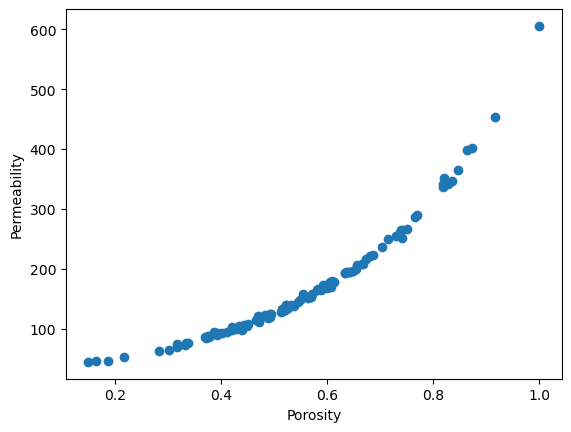

In [6]:
plt.scatter(X,Y)
plt.xlabel("Porosity")
plt.ylabel("Permeability")
plt.show()

## Splitting Data into training and testing sets:

We will import `train_test_split` from sklearn and use it to split our data into training (80%) and testing (20%) sets.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (84,)
Y_train shape: (84,)
X_test shape: (21,)
Y_test shape: (21,)


## Early Stopping:
We will use TensorFlow technique, EarlyStopping, to stop our training when there is no more improvement after each iteration.

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

Next, we will import mean_absolute_error from sklearn and use it to find the accuracy of our model.

In [9]:
from sklearn.metrics import mean_absolute_error

Now we will define a function `train_model`. In this function, we are defining three-layer model having three, five, and one neurons respectively. Number of iteration is 5000 and Learning rate is 0.0001. All these are the same as of Model 4 of our Numpy code. 

In [10]:
def train_model(X_train, Y_train):
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='relu', input_shape=(1,),kernel_initializer=tf.keras.initializers.he_normal(seed_value),name='1st_layer'),
    tf.keras.layers.Dense(5, activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed_value),name='2nd_layer'),
    tf.keras.layers.Dense(1,kernel_initializer=tf.keras.initializers.he_normal(seed_value), name='3rd_layer')
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(0.0001), 
                  loss='mse', 
                  metrics=['mae'])
    
    callbacks = EarlyStopping(monitor='loss', patience=100)
    history = model.fit(X_train, Y_train, epochs=5001,verbose=0, callbacks=[callbacks])

    num_iterations = len(history.epoch)
    for i, cost in enumerate(history.history['loss']):
        if i % 100 == 0:
            print("Train Cost after iteration {}: {}".format(i, cost))

    Y_pred = model.predict(X_train)

    print("\033[1mTrainning stop after iteration {}\033[0m".format(i))
    mae = mean_absolute_error(Y_train, Y_pred)
    accuracy = (1 - mae / np.mean(Y_train)) * 100.0
    print("\033[1mTrain Accuracy is:\033[0m", "\033[1m{}\033[0m".format(accuracy))

    
    """Uncomment the below code to see the values of shapes of weights and bias
    weights = model.get_weights()
    for i in range(1, 4):
        layer_weights = weights[i*2-2]
        layer_bias = weights[i*2-1]
        print(f"Weights of layer {i}:")
        print(layer_weights)
        print(f"shape {layer_weights.shape}")
        print(f"Bias of layer {i}:")
        print(layer_bias)
        print(f"shape {layer_bias.shape}")"""
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, Y_train, marker='o', c='blue', label='Actual Value')
    plt.scatter(X_train, Y_pred, marker='o', c='red', label='Predicted Value')
    plt.xlabel("Porosity")
    plt.ylabel("Permeability")
    plt.legend()
    plt.show()
         
    return history

In the below cell, I am setting the seed value to 42, an arbitrary choice, so we can get the same results everytime we run the cell.

In [11]:
seed_value = 42
tf.random.set_seed(seed_value)

## Training our Model

Train Cost after iteration 0: 39051.36328125
Train Cost after iteration 100: 821.2244873046875
Train Cost after iteration 200: 461.29644775390625
Train Cost after iteration 300: 467.7672119140625
Train Cost after iteration 400: 371.594970703125
Train Cost after iteration 500: 321.7469482421875
Train Cost after iteration 600: 252.75509643554688
Train Cost after iteration 700: 154.65579223632812
Train Cost after iteration 800: 97.59901428222656
Train Cost after iteration 900: 68.09151458740234
Train Cost after iteration 1000: 63.897308349609375
Train Cost after iteration 1100: 49.16272735595703
Train Cost after iteration 1200: 46.025291442871094
Train Cost after iteration 1300: 68.93112182617188
Train Cost after iteration 1400: 45.068946838378906
3/3 [==============================] - 0s 5ms/step
Trainning stop after iteration 1488
Train Accuracy is: 96.51009394901855


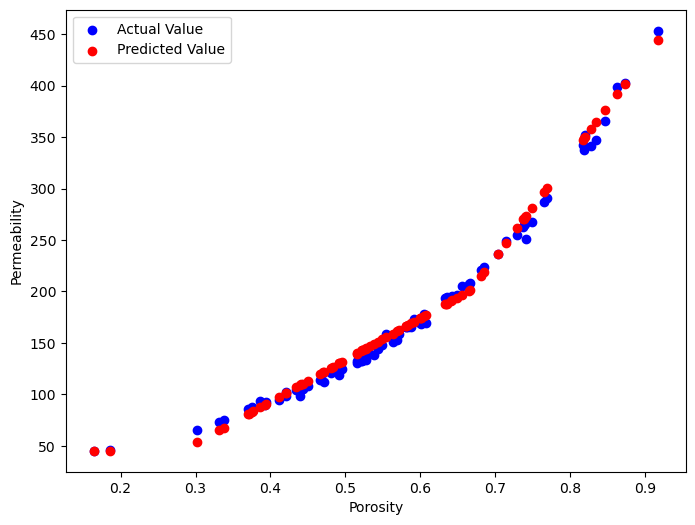

In [12]:
our_model = train_model(X_train, Y_train)

**See! Our model  automatically stopped training after iteration 1488, saved us from unnecessary additional 3512 iterations.** And, our training accuracy is 96.51%. Good to go. Now check out the testing accuracy.

The below function will evaluate our trained model and compare it's results with the test data.

In [13]:
def evaluate_model(model, X_test, Y_test):

    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    accuracy = (1 - mae / np.mean(Y_test)) * 100.0
    print("\033[1mTest Accuracy is:\033[0m", "\033[1m{}\033[0m".format(accuracy))


    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, Y_test, marker='o', c='blue', label='Actual Value')
    plt.scatter(X_test, Y_pred, marker='o', c='red', label='Predicted Value')
    plt.xlabel("Porosity")
    plt.ylabel("Permeability")
    plt.legend()
    plt.show()
    
    df = pd.DataFrame({"Actual Permeability": np.squeeze(Y_test), "Predicted Permeability": np.squeeze(Y_pred)})
    data_top_bottom = pd.concat([df.head(5), df.tail(5)])
    table_style = [{'selector': 'th', 'props': [('background-color', '#4287f5'), ('color', 'white'), ('font-size', '14px'), ('border', '1px solid black')]},
                   {'selector': 'td', 'props': [('border', '1px solid black'), ('font-size', '14px'), ('text-align', 'center')]}]
    styled_table = data_top_bottom.style.set_table_styles(table_style)
    display(styled_table)


1/1 [==============================] - 0s 88ms/step
Test Accuracy is: 92.84017589782391


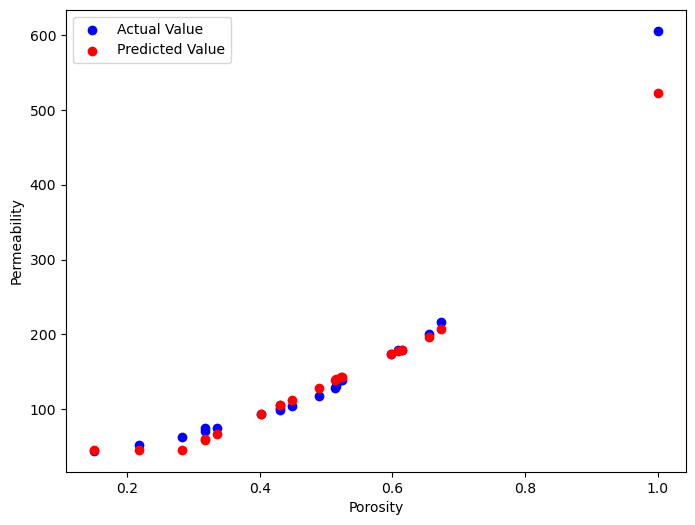

,Actual Permeability,Predicted Permeability
85,98.809947,105.477997
83,200.101407,196.367538
91,70.203685,59.712669
49,52.668538,45.365498
43,104.817867,112.642967
32,605.710140,522.838806
78,217.147307,207.326248
89,63.219223,45.522907
15,118.242280,128.862274
60,75.352053,66.608978


In [14]:
evaluate_model(our_model.model, X_test, Y_test)

So, testing accuracy is 92.84%. Not overfitting.

Try tunning the hyperparameters and running this code with your own data (or with this data).